### Home work 3
###### your_student_id

The goal of this home work is to design convolutional neural network for classification task on two dataset (a) cifar10 (b) Bricklane. As a part of this home work you will implement convolutional neural network in python and then study the effect of pooling, dropout, batch normalization and learning rate for given classifcation task. 
<br>
Please note:
- You have to save each trained model weights and tensorboard logs in different folder. Use proper names for the model
- You have to show trainings in this notebook file, so make sure that the printings and figures are available on this notebook file
- This notebook is also your report file. So add your comments and analysis of each task. This would be considered short report and it is compulsory part of the homework.
- Your system memory may overflow. In that case please reset memory for trained model(s) keeping printed logs and history of trained model. History of all trained models could be used to plot the trends.
- For trends you shall also use tensorboard logs 




#### imports

In [2]:
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau, TensorBoard
from keras.utils import plot_model, to_categorical
import keras.backend as K
from keras.datasets import cifar10
import keras

from sklearn.model_selection import train_test_split
from IPython.display import display

import cv2
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#import seaborn as sns

import os
your_id = 16160000
np.random.seed(your_id)


###### Hyperparameters

In [11]:
batch_size = 16
num_classes = 10
class_labels = np.arange(0, num_classes, 1)
input_shape = (32,32,3)
images_dir = 'images/'

##### Task 1.1   Load dataset information
[_cifar10_](https://www.cs.toronto.edu/~kriz/cifar.html) dataset contains 10 classes including airplane, bird, cat etc. You need to download dataset from [LINK](http://pjreddie.com/media/files/cifar.tgz) or [LINK2](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz). 
<br> _cifar10_ dataset is also available in keras but it is recommended to use the downloaded from above given link as ```cifar10.load_data()``` function downloads and loads complete data on RAM. 
<br> <br>
This [Github](https://github.com/EN10/CIFAR) link may be helpful to you to load _cifar10_ dataset yourself.


###### Method -1

In [3]:
# Add your code here
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=your_id)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# url = http://pjreddie.com/media/files/cifar.tgz
#

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

 24371200/170498071 [===>..........................] - ETA: 1:23:22

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

###### Method -2

In [2]:
dir = 'cifar/train'
paths_images = os.listdir (dir)
print (paths_images)


['0_frog.png', '10000_automobile.png', '10001_frog.png', '10002_frog.png', '10003_ship.png', '10004_ship.png', '10005_cat.png', '10006_deer.png', '10007_frog.png', '10008_airplane.png', '10009_frog.png', '1000_truck.png', '10010_airplane.png', '10011_cat.png', '10012_frog.png', '10013_frog.png', '10014_dog.png', '10015_deer.png', '10016_ship.png', '10017_cat.png', '10018_bird.png', '10019_frog.png', '1001_deer.png', '10020_airplane.png', '10021_cat.png', '10022_automobile.png', '10023_deer.png', '10024_airplane.png', '10025_frog.png', '10026_frog.png', '10027_bird.png', '10028_horse.png', '10029_frog.png', '1002_cat.png', '10030_truck.png', '10031_airplane.png', '10032_deer.png', '10033_dog.png', '10034_horse.png', '10035_automobile.png', '10036_frog.png', '10037_horse.png', '10038_truck.png', '10039_automobile.png', '1003_bird.png', '10040_horse.png', '10041_horse.png', '10042_ship.png', '10043_airplane.png', '10044_cat.png', '10045_horse.png', '10046_deer.png', '10047_horse.png', '10

In [9]:
import glob
paths = glob.glob(dir +'*frog.png')
print (paths)

['cifar/train/0_frog.png', 'cifar/train/10001_frog.png', 'cifar/train/10002_frog.png', 'cifar/train/10007_frog.png', 'cifar/train/10009_frog.png', 'cifar/train/10012_frog.png', 'cifar/train/10013_frog.png', 'cifar/train/10019_frog.png', 'cifar/train/10025_frog.png', 'cifar/train/10026_frog.png', 'cifar/train/10029_frog.png', 'cifar/train/10036_frog.png', 'cifar/train/10052_frog.png', 'cifar/train/10053_frog.png', 'cifar/train/10058_frog.png', 'cifar/train/10063_frog.png', 'cifar/train/10097_frog.png', 'cifar/train/10108_frog.png', 'cifar/train/10109_frog.png', 'cifar/train/10111_frog.png', 'cifar/train/10113_frog.png', 'cifar/train/10117_frog.png', 'cifar/train/10128_frog.png', 'cifar/train/1013_frog.png', 'cifar/train/10165_frog.png', 'cifar/train/1016_frog.png', 'cifar/train/10173_frog.png', 'cifar/train/10176_frog.png', 'cifar/train/1017_frog.png', 'cifar/train/10183_frog.png', 'cifar/train/10195_frog.png', 'cifar/train/10199_frog.png', 'cifar/train/10200_frog.png', 'cifar/train/102

In [15]:
dir2 = 'dataset2'
class_names = os.listdir (dir2)
print ('class_names:', class_names)
paths1 = os.listdir(os.path.join (dir2, class_names[0]))
label1 = np.ones(len(paths1)) * 0
paths2 = os.listdir(os.path.join (dir2, class_names[1]))
label2 = np.ones(len(paths2)) * 1
paths = (paths1) + (paths2)
labels = [(label1) + (label2)]
print (paths)
print (labels)

class_names: ['Airport', 'Bridge', 'Forest', 'Parking']


ValueError: operands could not be broadcast together with shapes (55,) (52,) 

##### Task 1.2 Preprocessing
Preprocessing of data such as normalization, mean shift, make the learning task simple for network and could accelrate the training process. 

###### Task 1.2.1 
For the images, pixel values vary from 0 to 255. To shift the values between (0,1) range, divide input image by 255. Now, retrain the model designed in part-A from scratch with preprocessed data. 

In [3]:
# You shall add your code here
def preprocessing_norm (images):
    #Add code here
    
    return processed_images


###### Task 1.2.2
For the images, pixel values vary from 0 to 255. Compute the channel wise mean and standard daviation (std) for whole dataset. subtract channel-wise mean and divide by channel-wise std. This will shift the mean to zero and varation to 1. 

In [8]:
# You shall add your code here
def preprocessing_meanShift (images):
    #Add code here
    
    return processed_images


##### Task 1.3  Batch Generator
For the training, we load complete data (inputs, outputs) into RAM and then provide it to "model.fit" function. However, in real when dataset is very large in size we can not load complete data on RAM. In that case, we need load data batchwise. To do this, we need to write a generator function that shall load a batch of data (images and output), preprocess images and return a tuple as (inputs, outputs) on every step. 
<br>
- The template code for batch generator is provided. You need add you script to read image(s), labels and preprocessing of images. 
<br>
- You need to check and control values of batch_start and batch_end 
<br>
- Batch generator can be implemented in multiple ways. You can use any other template of your choice.

In [28]:
# You need to check and control values of batch_start and batch_end 

def data_generator(images_paths,label_file, batch_size = 64, preprocessing = None):
    batch_start = ...
    batch_end = ...
    
    while True:
        while (batch_end< n):
            
            # Add your code here
            # Preprocessing is your choice. 
            batch_images = 
            if (preprocessing is None):
                pass
            elif (preprocessing == 'method1'):
                batch_images = preprocessing_norm(batch_images)
            else:
                batch_images = preprocessing_meanShift(batch_images)
            
            batch_x = np.array( batch_images )
            batch_y = np.array( batch_labels )
            yield( batch_x, batch_y )
          

##### Task 1.4 Design CNN model

In [12]:
# Add your code here

input_im = Input(shape=(input_shape), name='input_im')
conv1 = Conv2D(8, kernel_size=(3, 3), strides = (2,2),  activation='relu')(input_im)
conv2 = Conv2D(16, (3, 3), strides = (2,2), activation='relu')(conv1)
flat = Flatten()(conv2)
dense1 = Dense(44, activation='relu')(flat)
output_class = Dense(num_classes, activation='softmax')(dense1)

model = Model(inputs=input_im, outputs=output_class)

##### Compile model and plot

In [13]:
model_name = 'id_model1'

if not os.path.exists('./'+model_name):
    os.mkdir(model_name)
    
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])

plot_model(model, model_name+'/'+model_name+'.png')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_im (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 8)         224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 44)                34540     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                450       
Total params: 36,382
Trainable params: 36,382
Non-trainable params: 0
_________________________________________________________________


##### Task 1.5 Training model
In order to train the model, instead of "model.fit" function, we will use "model.fit_generator" function for training. For details check out [keras documentation](https://keras.io/models/sequential/)

In [17]:
class LRTensorBoard(TensorBoard):
    def __init__(self, *args, **kwargs):
        super(LRTensorBoard, self).__init__(*args, **kwargs)

    def on_epoch_end(self, epoch, logs=None):
        logs.update({'lr': K.eval(self.model.optimizer.lr)})
        super(LRTensorBoard, self).on_epoch_end(epoch, logs)

In [36]:
epochs = ???
    
checkpoint = ModelCheckpoint(model_name+'/'+model_name+'-{epoch:02d}-{val_loss:.2f}.h5', 
                             monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
cvslogger = CSVLogger(model_name+'/logs.csv', separator=',', append=True)
reducelr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)
tensorboard = LRTensorBoard(log_dir='./'+model_name, histogram_freq=0, write_graph=True, write_grads=1, 
                            batch_size=batch_size, write_images=True)

callbacks = [checkpoint, tensorboard, cvslogger, reducelr]

###### Task 1.5.1 
Train model without using any pre-processing scheme

In [29]:
train_gen = data_generator(x_train, y_train, batch_size, preprocessing = None)
val_gen = data_generator(x_val, y_val, batch_size)
test_gen = data_generator(x_test, y_test, batch_size)

In [33]:
x,y= val_gen.__next__()

In [38]:
hist1 = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=len(y_train)//batch_size, 
                           validation_data=val_gen, validation_steps=len(y_val)//batch_size, 
                           callbacks=callbacks, verbose=1)

# save model

Epoch 1/3
2093/2093 [==============================] - 23s 11ms/step - loss: 12.0886 - acc: 0.2500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/3
2093/2093 [==============================] - 23s 11ms/step - loss: 12.0886 - acc: 0.2500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/3
2093/2093 [==============================] - 23s 11ms/step - loss: 12.0886 - acc: 0.2500 - val_loss: 16.1181 - val_acc: 0.0000e+00


###### Task 1.5.2 
Train model by using data preprocessing i.e normalization or mean shift. 

In [39]:
model = None

# Add your code here

# save model

##### Task 2.1 Pooling
Now, you need to modify the model by adding pooling layer(s). Pooling could be average pooling or max pooling. You can use the size and stride for pooling of your choice. 
<br> 
Modify the network by introducing pooling layer and train the model using __fit_generator__ function. 

In [16]:
model = None

# Add your code here

# save model

##### Task 3.1 Dropout
Modify the network by introducing dropout layer and train the model using __fit_generator__ function. 

In [6]:
model = None

# Add your code here

# save model


##### Task 4.1 Batch Normalization
Modify the network by introducing batch normalization layer and train the model. 

In [41]:
model = None

# Add your code to complete this cell

model_name = 'id_model41'
if not os.path.exists('./'+model_name):
    os.mkdir(model_name)
    
# ====================================================   
input_im = Input(shape=(input_shape), name='input_im')

# Hidden Layers

output_class = Dense(num_classes, activation='softmax')(dense1)
model = Model(inputs=input_im, outputs=output_class)
# ====================================================

adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])
plot_model(model, model_name+'/'+model_name+'.png')
model.summary()

hist_41 = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=len(y_train)//batch_size, 
                           validation_data=val_gen, validation_steps=len(y_val)//batch_size, 
                           callbacks=callbacks, verbose=1)

# save model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_im (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 8)         224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 8)         32        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 16)          64        
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 44)                34540     
__________

##### Task 5.1 Comparision of all model

In this task you need to plot the loss and accuracy for all models and __discuss__ which model has better performance and why.   

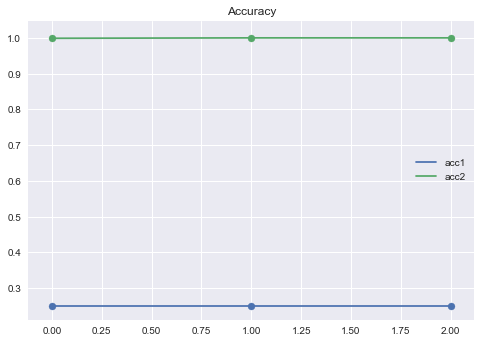

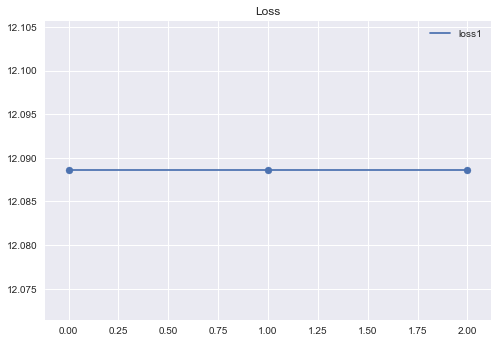

In [75]:
# plot Accuracy of all models
plt.clf() 
x_axis = list(range(epochs))
plt.plot(x_axis, hist1.history['acc'], label='acc1')
plt.scatter(x_axis, hist1.history['acc'])
plt.plot(x_axis, hist2.history['acc'], label='acc2')
plt.scatter(x_axis, hist2.history['acc'])
plt.legend()
plt.title('Accuracy')
plt.show()


# plot loss of all models
plt.clf() 
x_axis = list(range(epochs))
plt.plot(x_axis, hist1.history['loss'], label='loss1')
plt.scatter(x_axis, hist1.history['loss'])
plt.legend()
plt.title('Loss')
plt.show()

###### Tensorboard 

You can run TensorBoard using the following command
```tensorboard --logdir=path/to/log-directory
```
Now for logs of all above trained models, take snapshot of the _loss_ and _accuracy_ plots and save in the directory where this notebook is. To show that saved plot here in notebook use following command in _markdown_ cell. 
<br> __![](path_to_image)__

- Tensorboard plot of accuracies:
!['loss'](loss.png)

- Tensorboard plot of accuracies:
!['Accuracy](acc.png)


###### ADD Your Comments here

##### Task 5.2 Visualize Activations
In this task, you are required to visualize the activations (outputs) of both the convolution layers of a model. For help, please refer to __Tutorials__

In [ ]:
## ADD you code here

##### Task 6.1  Effect of learning rate

Take the best selected model in __Task 5.1__ and change its learning rate to: 
- 6.1.1 any value between 5 and 1.
- 6.1.2 learning rate = any value between 0.6 and  0.1 
- 6.1.3 learning rate = 0.00001

and train these three models to compare the effect learning rate.

In [ ]:
# add your code here

###### Task 6.2 Plot loss and accuracy

Plot the loss and accracy for best model selected in task 5.1, and model trained in 6.1.1, 6.1.2 and 6.1.3 task. Give the detailed analysis of the effect of learning rate in your words and select the best learning rate for this problem.

##### Additional Topics:
- [Keras callbacks](https://keras.io/callbacks/)
- custom callback 
- [custom loss function](https://stackoverflow.com/questions/43818584/custom-loss-function-in-keras/43821374)


In [ ]:
# custom loss function

import keras.backend as K

def customLoss(yTrue,yPred):
    return K.sum(yTrue - yPred)


model.compile(loss=customLoss, optimizer = .....)
